<a href="https://colab.research.google.com/github/drcrajc/nanoelectronics/blob/main/exp_set_qutip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 30.6 MB/s eta 0:00:00


<ipython-input-2-3718d6a0f3c4>:25: RuntimeWarning: overflow encountered in exp
  return delta_E / (np.exp(delta_E / (k_B * T)) - 1)


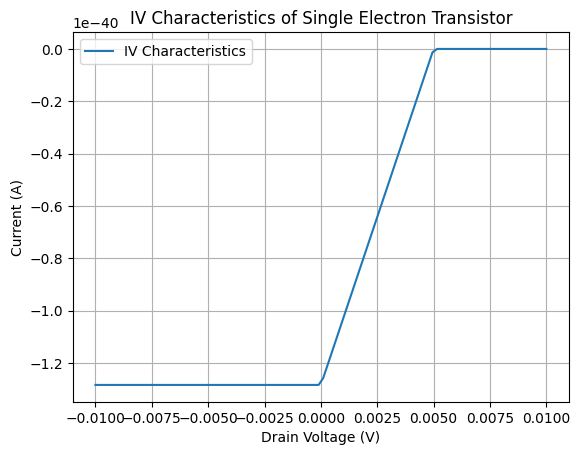

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Constants (for simplicity, arbitrary units are used)
e = 1.602e-19  # Elementary charge (Coulombs)
C_g = 1e-16  # Gate capacitance (Farads)
C_s = 1e-16  # Source capacitance (Farads)
C_d = 1e-16  # Drain capacitance (Farads)
T = 0.1  # Temperature (Kelvin)
k_B = 1.38e-23  # Boltzmann constant (J/K)
V_d = np.linspace(-0.01, 0.01, 100)  # Drain voltage (V)
V_g = 0.005  # Gate voltage (V)

# Function to calculate total capacitance
def total_capacitance():
    return C_g + C_s + C_d

# Function to calculate the charging energy
def charging_energy(n):
    return (n - C_g * V_g / e)**2 / (2 * total_capacitance())

# Function to calculate the tunneling rate
def tunneling_rate(delta_E):
    return delta_E / (np.exp(delta_E / (k_B * T)) - 1)

# Function to calculate current at a given drain voltage
def current(V_d):
    I = []
    for V in V_d:
        delta_E_s = e * V  # Energy difference for tunneling to source
        delta_E_d = e * (V - V_g)  # Energy difference for tunneling to drain

        # Calculate tunneling rates
        Gamma_s = tunneling_rate(delta_E_s)
        Gamma_d = tunneling_rate(delta_E_d)

        # Current is proportional to the difference between the rates
        I.append(e * (Gamma_s - Gamma_d))

    return np.array(I)

# Simulate the IV characteristics
I = current(V_d)

# Plot the IV curve
plt.plot(V_d, I, label="IV Characteristics")
plt.xlabel("Drain Voltage (V)")
plt.ylabel("Current (A)")
plt.title("IV Characteristics of Single Electron Transistor")
plt.grid(True)
plt.legend()
plt.show()
